In [7]:
# Cell 1: Import Libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Explanation: For testing and plotting.

In [8]:
# Cell 2: Load Test Data and Model
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Load saved model
from torch.nn import Conv2d, Linear, ReLU  # Import layers
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = Conv2d(1, 32, 3, 1)
        self.fc = Linear(32 * 26 * 26, 10)
        self.relu = ReLU()
    def forward(self, x):
        x = self.relu(self.conv(x))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = CNN()
model.load_state_dict(torch.load('cnn_model.pth'))
model.eval()

# Explanation: Reload model for testing.

CNN(
  (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc): Linear(in_features=21632, out_features=10, bias=True)
  (relu): ReLU()
)

In [9]:
# Cell 3: Evaluate Accuracy
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

# Explanation: Compare predictions to true labels.

Test Accuracy: 97.60%


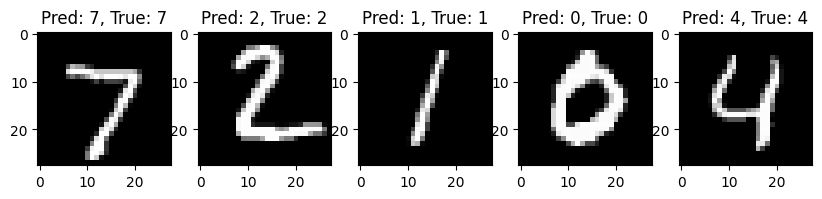

In [12]:
# Cell 4: Visualize Predictions
dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plot first 5
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Pred: {predicted[i]}, True: {labels[i]}")
plt.show()

# Explanation: Visual check—model should predict correctly most times.